In [5]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
pip install tensorflow


In [7]:
pip install --upgrade pip setuptools wheel


In [8]:
pip install tensorflow==2.15


In [9]:
import tensorflow as tf

In [10]:
print(tf.__version__)

2.15.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# divide the dataset into dependent and independent features
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [16]:
# feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [17]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


from matplotlib import pyplot as plt
import seaborn as sns
geography.groupby('Germany').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
geography.groupby('Spain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Spain'].value_counts()
    for x_label, grp in geography.groupby('Germany')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Germany')
_ = plt.ylabel('Spain')

In [20]:
X=X.drop(['Geography','Gender'],axis=1)

In [22]:
X=pd.concat([X,geography,gender],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [24]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Its important for ANNs to use StandardScaler(Scaling)**

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# So train -test got scaled !!

In [28]:
X_train.shape

(8000, 11)

# ANN

In [29]:
# create ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


### Dropout Layer : is basicallly used to kill some hidden layer neurons ;so that we can avoid overfitting

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# create  a neuron
classifier=Sequential([
    Dense(units=11,activation='relu'),
    Dropout(0.3),
    Dense(units=7,activation='relu'),
    Dropout(0.3),
    Dense(units=6,activation='relu'),
    Dropout(0.3),
    Dense(units=1,activation='sigmoid')
])
# train ann
classifier.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [54]:
## Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [55]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[early_stop])

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6077 - accuracy: 0.7231 - val_loss: 0.5112 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5269 - accuracy: 0.7959 - val_loss: 0.4882 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5001 - accuracy: 0.7962 - val_loss: 0.4710 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.7970 - val_loss: 0.4588 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7981 - val_loss: 0.4464 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7985 - val_loss: 0.4385 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4614 - accuracy: 0.8018 - val_loss: 0.4275 - val_accuracy: 0.7963

In [56]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


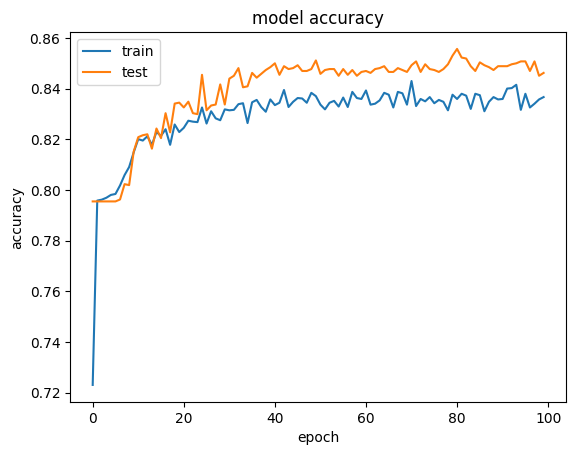

In [57]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



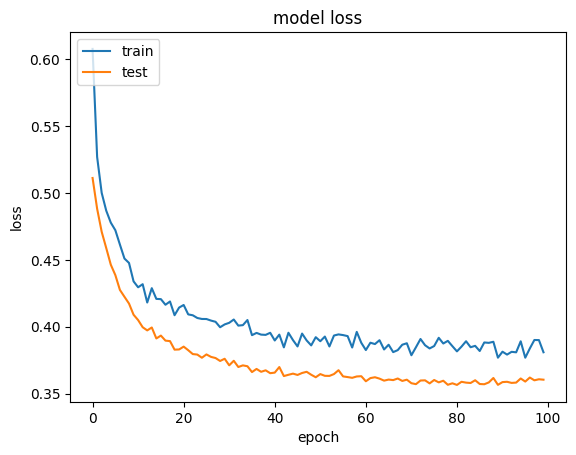

In [58]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# predict on test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [62]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1563,   32],
       [ 235,  170]])

In [59]:
# calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.853

In [60]:
classifier.weights

[<tf.Variable 'dense_28/kernel:0' shape=(11, 11) dtype=float32, numpy=
 array([[-3.38315330e-02,  9.10863653e-02, -7.67759681e-02,
          1.26068234e-01,  9.80994292e-03,  7.39011541e-02,
          7.28410063e-03,  7.72914141e-02, -3.92773328e-03,
         -2.52385847e-02, -6.12658635e-02],
        [ 1.79056466e-01, -1.03800690e+00,  3.01107913e-01,
         -7.92431235e-01,  1.22339837e-01, -6.27417207e-01,
          6.83316171e-01, -6.48682237e-01,  4.44325119e-01,
          1.72917947e-01,  8.94396424e-01],
        [ 9.07314122e-02, -1.00314647e-01, -1.84593797e-02,
         -1.16543472e-01,  1.99536830e-01,  4.97703068e-02,
          9.37520936e-02,  2.83640891e-01, -3.56181860e-02,
          6.23752773e-02,  1.21712430e-04],
        [-8.45203638e-01, -2.06955656e-01, -7.42857099e-01,
         -2.48952448e-01, -3.11642915e-01, -4.14988309e-01,
         -2.16378793e-01, -7.64729083e-01,  6.42721429e-02,
          2.03045055e-01,  3.49275202e-01],
        [-1.02579749e+00, -9.9536